In [44]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

In [45]:
import scipy.io

In [46]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
            img_name.append(filename)
    return images, img_name

In [118]:
imgs, img_name = load_images_from_folder('/home/pranjul/BranchingNets/all_images_net_input/2_96stimuli_matched_objects/')


In [119]:
img_name

['04_match.png',
 '80_match.png',
 '64_match.png',
 '75_match.png',
 '48_match.png',
 '56_match.png',
 '26_match.png',
 '37_match.png',
 '42_match.png',
 '08_match.png',
 '15_match.png',
 '34_match.png',
 '17_match.png',
 '57_match.png',
 '74_match.png',
 '72_match.png',
 '78_match.png',
 '20_match.png',
 '39_match.png',
 '53_match.png',
 '10_match.png',
 '83_match.png',
 '13_match.png',
 '44_match.png',
 '59_match.png',
 '12_match.png',
 '16_match.png',
 '22_match.png',
 '81_match.png',
 '06_match.png',
 '46_match.png',
 '43_match.png']

In [ ]:
len(img_name)

In [ ]:
int(img_name[0].split('.')[0])

In [ ]:
scipy.io.loadmat('S02_fix/S02_face_1.mat')['currImData'][:,4]

In [ ]:
scipy.io.loadmat('S02_fix/S02_face_1.mat')['currImData'][:,5]

In [ ]:
scipy.io.loadmat('S02_fix/S02_pareidolia_64.mat')

In [ ]:
for filename in os.listdir('S02_fix'):
    print(filename)

In [ ]:
def load_fix_from_folder(folder):
    fix_X = []
    fix_Y = []
    img_name = []
    for filename in os.listdir(folder):
        fix_X.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,4])
        fix_Y.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,5])
        img_name.append(str(scipy.io.loadmat(os.path.join(folder,filename))['currImName'][0][0]) + '.jpg')
        #print(filename)
        #print(img_name)
    return fix_X, fix_Y, img_name

In [ ]:
fix_X, fix_Y, img_name = load_fix_from_folder('S_fix/S13_fix')

In [ ]:
import glob
import os

# Specify the directory containing the nested folder structure
root_dir = '/home/pranjul/BranchingNets/all_images_net_input/'

# Specify the image file extensions you want to load
extensions = ['*.jpg', '*.jpeg', '*.png']

# Create a list to store the image file paths
image_paths = []

# Traverse through all subdirectories and search for image files
for extension in extensions:
    search_pattern = os.path.join(root_dir, '**', extension)
    image_paths.extend(glob.glob(search_pattern, recursive=True))

# Print the paths of the loaded image files
for image_path in image_paths:
    print(image_path)


In [ ]:
import os

def create_folder(folder_path):
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
import os

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)



In [ ]:
# Replace 'path/to/your/folder' with the folder path you want to check
folder_path = 'S_fix/S18_fix'
if folder_exists(folder_path):
    print(f"Folder '{folder_path}' exists.")
else:
    print(f"Folder '{folder_path}' does not exist.")


In [ ]:
for f in range(13, 56):
    print(f)
    print('S_fix/S'+ str(f) +'_fix')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

x = {}
for q in range(1, 10):
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = 'S_fix/S0'+ str(q) +'_fix'
    if folder_exists(folder_path):
    
        fix_X, fix_Y, img_name = load_fix_from_folder('S_fix/S0'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        folder_path = 'DG3_heatmaps/S0'+ str(q) +'_fix'
        create_folder(folder_path)


        for i in range(len(img_name)):

            image = cv2.imread('/home/pranjul/DeepGaze/fix_stimuli/' + img_name[i])

            if image is not None and len(fix_X[i]) > 3 and len(fix_Y[i] > 3):

                # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
                #fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
                #fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

                #print(img_name[i])

                fixation_history_x = fix_X[i]/3
                #print(fixation_history_x)
                fixation_history_y = fix_Y[i]/3

                # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
                # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
                # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
                centerbias_template = np.load('centerbias_mit1003.npy')
                
                # rescale to match image size
                centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
                # renormalize log density
                centerbias -= logsumexp(centerbias)

                image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
                x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
                y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

                log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

                # Scale factor
                #scale_factor = 3

                # Calculate the new width and height
                #new_width = image.shape[1] * scale_factor
                #new_height = image.shape[0] * scale_factor

                # Resize the image using cv2.resize()
                #image = cv2.resize(image, (new_width, new_height))

                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


                f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
                axs[0].imshow(image)
                #axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                #axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
                axs[0].set_axis_off()
                axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
                #axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                #axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
                axs[1].set_axis_off()
                plt.savefig(os.path.join('DG3_heatmaps/S0'+ str(q) +'_fix', img_name[i]))
                plt.close()
                #break
        #break
    #break

In [ ]:
len(fixation_history_y)

In [ ]:
i

In [ ]:
S02_img_name[244]

In [ ]:
np.where(np.array(S02_img_name) == '44.jpg')

In [ ]:
indices = np.where(arr == 2)[0]

In [ ]:
img.shape

In [ ]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)

# image = face()

x = {}

for i in range(len(image_paths)):
    print(i)
    
    image = cv2.imread(image_paths[i])
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    #a = log_density_prediction.detach().cpu().numpy()[0, 0]
    
    #x[img_name[i].split('.')[0]] = a
    
    
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    plt.savefig(os.path.join('DG2_modified_imgs_heatmaps', '{0}.jpg'.format(i)))
    
    
    #break

In [120]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()
x = {}


for i in range(len(imgs)):
    
    image = imgs[i]
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # centerbias_template = np.zeros((1024, 1024))
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0,0]
    
    x[img_name[i].split('.')[0]] = a
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    #plt.savefig(os.path.join('DG2_heatmaps_wardle/objects', '{0}.jpg'.format(i)))
    #plt.close()
    '''
    
    #break

Loaded pretrained weights for efficientnet-b5


Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


In [93]:
len(x)

32

In [10]:
x['face17']

(224, 224)

In [25]:
import pickle

In [26]:
with open('/home/pranjul/BranchingNets/wardle_occ_heatmaps.pkl', 'rb') as file:
    x_loaded = pickle.load(file)

In [40]:
x_loaded_faces = {}
x_loaded_objects = {}


for item in x_loaded:
    x_loaded_faces[item[2]] = item[0]
    x_loaded_objects[item[2]] = item[1]
    #print(item)
    #break

In [32]:
item[2]

'face01'

In [43]:
import glob
from scipy.io import loadmat
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:

y_faces = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/faces/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_faces[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [ ]:

y_objects = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/objects/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_objects[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [ ]:

y_pareidolia = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/pareidolia/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_pareidolia[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [ ]:
y_pareidolia['2']['a']

In [ ]:
plt.imshow(y_pareidolia['2']['a'])
plt.axis('off')
plt.tight_layout()
plt.savefig('HG_mars_face.png', dpi=600)

In [58]:
len(x)

32

In [50]:
dg_faces = []
eg_faces = []
ke = []
correlation_coef_faces_faces = []

for k in x:
    if k in x_loaded_faces:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_faces.append(scaler.fit_transform(np.array(x[k])).flatten())
        #eg_faces.append(scaler.fit_transform(np.array(y_faces[k]['a'])).flatten())
        correlation_coef_faces_faces.append(spearmanr(np.array(x[k]).flatten(),
                                                np.array(x_loaded_faces[k]).flatten())[0])
        #correlation_coef = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())

    #break

#spearmanr(scaler.fit_transform(cv2.resize(x['1397'], (800, 600))).flatten(), scaler.fit_transform(y_faces['1397']['a']).flatten())[0]

    
# correlation_coef, p_value = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# correlation_coef = np.corrcoef(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

face17
face21
face09
face25
face30
face08
face22
face14
face20
face27
face32
face03
face26
face04
face01
face12
face10
face15
face29
face28
face02
face11
face18
face16
face24
face13
face31
face23
face06
face05
face07
face19


In [51]:
correlation_coef_faces_faces

[0.5099971236483624,
 -0.026241441654449738,
 -0.020265497284517868,
 0.4063251070588855,
 0.3240486077872093,
 0.14445891512623224,
 0.41308937854116157,
 -0.004552731801563413,
 -0.14629130014113925,
 -0.17796472766216587,
 0.10823127634439098,
 -0.1036388726439182,
 0.4898634291550803,
 -0.14191138835482203,
 0.17017885053080817,
 -0.0685674257711077,
 0.19682761161570433,
 -0.024932307629548577,
 0.09085146063083599,
 0.10724614767610752,
 0.1275757155386799,
 -0.005531245817122926,
 0.12811042722444704,
 0.2126234622472742,
 0.2906153059519458,
 0.07419028017113186,
 0.3159197415696739,
 0.22620924722727126,
 0.319571617490123,
 0.4698188770871277,
 -0.4681449719330817,
 0.005253650225882409]

In [52]:
np.mean(correlation_coef_faces_faces)

0.12321763506734057

In [53]:
np.std(correlation_coef_faces_faces)

0.2183971606517001

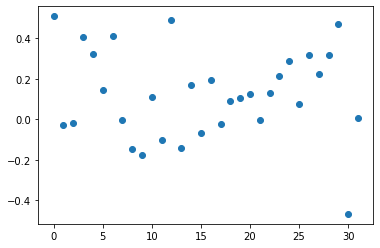

In [54]:
plt.plot(correlation_coef_faces_faces, 'o')

In [59]:
dg_faces = []
eg_faces = []
ke = []
correlation_coef_faces_objects = []

for k in x:
    if k in x_loaded_objects:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_faces.append(scaler.fit_transform(np.array(x[k])).flatten())
        #eg_faces.append(scaler.fit_transform(np.array(y_faces[k]['a'])).flatten())
        correlation_coef_faces_objects.append(spearmanr(np.array(x[k]).flatten(),
                                                np.array(x_loaded_objects[k]).flatten())[0])
        #correlation_coef = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())

    #break

#spearmanr(scaler.fit_transform(cv2.resize(x['1397'], (800, 600))).flatten(), scaler.fit_transform(y_faces['1397']['a']).flatten())[0]

    
# correlation_coef, p_value = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# correlation_coef = np.corrcoef(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

face17
face21
face09
face25
face30
face08
face22
face14
face20
face27
face32
face03
face26
face04
face01
face12
face10
face15
face29
face28
face02
face11
face18
face16
face24
face13
face31
face23
face06
face05
face07
face19


In [60]:
correlation_coef_faces_objects

[-0.5099854364525329,
 0.026259847989443807,
 0.020178856104569327,
 -0.40632977483144384,
 -0.32404317604152766,
 -0.14419952890322452,
 -0.41308012768473323,
 0.004591193915821278,
 0.146371090379725,
 0.17796479406162266,
 -0.10821486907892959,
 0.10364029161797932,
 -0.4898773143716616,
 0.1419109655373156,
 -0.1701768781333115,
 0.06856814793345584,
 -0.19683195920689806,
 0.024874697565342434,
 -0.09085705460991511,
 -0.10723372454340571,
 -0.12759346225445095,
 0.0055338842134646194,
 -0.12810119374303117,
 -0.2126253521598383,
 -0.29067044765817596,
 -0.07419893928510361,
 -0.31591976903664726,
 -0.2258328088478649,
 -0.31963421300215394,
 -0.46981888362533153,
 0.46814724548718833,
 -0.0052516212065825164]

In [61]:
np.mean(correlation_coef_faces_objects)

-0.12320110999596359

In [62]:
np.std(correlation_coef_faces_objects)

0.2183951924561227

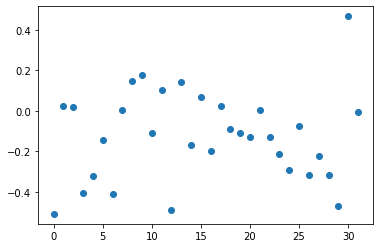

In [63]:
plt.plot(correlation_coef_faces_objects, 'o')

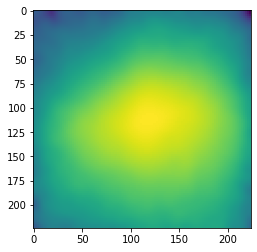

In [133]:
plt.imshow(x['04_match'])

In [131]:
plt.imshow(x_loaded_faces['04_match'])

In [132]:
plt.imshow(x_loaded_objects['04_match'])

In [121]:
dg_objects = []
eg_objects = []
ke = []
correlation_coef_objects_faces = []

for k in x:
    if k in x_loaded_faces:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_objects.append(np.array(x[k]).flatten())
        #eg_objects.append(np.array(y_objects[k]['a']).flatten())
        correlation_coef_objects_faces.append(spearmanr(np.array(x[k]).flatten(), 
                                                  np.array(x_loaded_faces[k]).flatten())[0])

    #break

#correlation_coef, p_value = spearmanr(np.array(dg_objects).flatten(), np.array(eg_objects).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

04_match
80_match
64_match
75_match
48_match
56_match
26_match
37_match
42_match
08_match
15_match
34_match
17_match
57_match
74_match
72_match
78_match
20_match
39_match
53_match
10_match
83_match
13_match
44_match
59_match
12_match
16_match
22_match
81_match
06_match
46_match
43_match


In [122]:
correlation_coef_objects_faces

[-0.10075085172665267,
 0.2542756629665477,
 -0.17341913257995764,
 0.21556623867479816,
 -0.2623735289955923,
 0.15269670636585908,
 0.1642464000623147,
 0.2245327057953101,
 -0.048337343091761686,
 0.0696604856827532,
 0.1934242234418116,
 -0.2555726922582451,
 -0.07729199084159952,
 0.14751407026537808,
 -0.023034032455380812,
 0.4250848067342584,
 0.25171704628165975,
 0.2650534396020691,
 0.3091994979675506,
 0.3682398116359065,
 -0.04164284292578038,
 0.028982738034957586,
 0.06950836673637245,
 0.4119967797266436,
 -0.26163045830707243,
 0.4270500003045581,
 -0.38567077615954715,
 -0.025889839219443853,
 0.2016495410854709,
 -0.08095141345533323,
 -0.10385885466513126,
 0.294212833469525]

In [123]:
np.mean(correlation_coef_objects_faces)

0.08231836244225771

In [124]:
np.std(correlation_coef_objects_faces)

0.21720539343106646

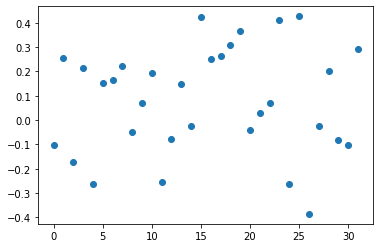

In [125]:
plt.plot(correlation_coef_objects_faces, 'o')

In [ ]:
len(correlation_coef_objects_faces)

In [126]:
dg_objects = []
eg_objects = []
ke = []
correlation_coef_objects_objects = []

for k in x:
    if k in x_loaded_objects:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_objects.append(np.array(x[k]).flatten())
        #eg_objects.append(np.array(y_objects[k]['a']).flatten())
        correlation_coef_objects_objects.append(spearmanr(np.array(x[k]).flatten(), 
                                                  np.array(x_loaded_objects[k]).flatten())[0])

    #break

#correlation_coef, p_value = spearmanr(np.array(dg_objects).flatten(), np.array(eg_objects).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

04_match
80_match
64_match
75_match
48_match
56_match
26_match
37_match
42_match
08_match
15_match
34_match
17_match
57_match
74_match
72_match
78_match
20_match
39_match
53_match
10_match
83_match
13_match
44_match
59_match
12_match
16_match
22_match
81_match
06_match
46_match
43_match


In [127]:
correlation_coef_objects_objects

[0.10077085228611085,
 -0.25427393104554996,
 0.17341822765902512,
 -0.2155556367170711,
 0.26237400680709805,
 -0.15269682105266183,
 -0.164246677639594,
 -0.224532724505017,
 0.048335540766563496,
 -0.06966928843927432,
 -0.19342372193973395,
 0.25557163697233815,
 0.07729658632301512,
 -0.1475155556602704,
 0.02303393072595521,
 -0.42508400713417965,
 -0.25171739850259944,
 -0.26505411499071624,
 -0.30920615018392217,
 -0.36824085190318,
 0.04164074124524904,
 -0.0289836352720952,
 -0.06951248967947542,
 -0.412002962990319,
 0.2616283007991018,
 -0.4270499763202216,
 0.3856824974262459,
 0.0258962300910163,
 -0.20165712196527014,
 0.08095667385570754,
 0.10386040374506872,
 -0.29421395643115544]

In [128]:
np.mean(correlation_coef_objects_objects)

-0.08231785605218161

In [129]:
np.std(correlation_coef_objects_objects)

0.21720727644996

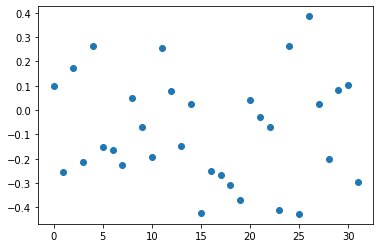

In [130]:
plt.plot(correlation_coef_objects_objects, 'o')

In [104]:
len(correlation_coef_objects_objects)

32

In [108]:
dg_pareidolia = []
eg_pareidolia = []
ke = []
correlation_coef_pareidolia_faces = []

for k in x:
    if k in x_loaded_faces:
        print(k)
        ke.append(k)
        # print(np.shape(x[k]))
        # print(y_faces[k])
        # dg_pareidolia.append(scaler.fit_transform(np.array(x[k])).flatten())
        # eg_pareidolia.append(scaler.fit_transform(np.array(y_pareidolia[k]['a'])).flatten())
        correlation_coef_pareidolia_faces.append(spearmanr(np.array(x[k]).flatten(), 
                                           np.array(x_loaded_faces[k]).flatten())[0])
        
    #break

# correlation_coef, p_value = spearmanr(np.array(dg_pareidolia).flatten(), np.array(eg_pareidolia).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

83
75
17
46
44
16
34
74
08
04
26
53
15
78
59
81
57
48
20
39
37
42
80
22
12
06
10
64
13
72
43
56


In [109]:
np.mean(correlation_coef_pareidolia_faces)

0.21737735199572072

In [110]:
np.std(correlation_coef_pareidolia_faces)

0.20913369408513166

In [111]:
plt.plot(correlation_coef_pareidolia_faces, 'o')

In [112]:
len(correlation_coef_pareidolia_faces)

32

In [113]:
dg_pareidolia = []
eg_pareidolia = []
ke = []
correlation_coef_pareidolia_objects = []

for k in x:
    if k in x_loaded_objects:
        print(k)
        ke.append(k)
        # print(np.shape(x[k]))
        # print(y_faces[k])
        # dg_pareidolia.append(scaler.fit_transform(np.array(x[k])).flatten())
        # eg_pareidolia.append(scaler.fit_transform(np.array(y_pareidolia[k]['a'])).flatten())
        correlation_coef_pareidolia_objects.append(spearmanr(np.array(x[k]).flatten(), 
                                           np.array(x_loaded_objects[k]).flatten())[0])
        
    #break

# correlation_coef, p_value = spearmanr(np.array(dg_pareidolia).flatten(), np.array(eg_pareidolia).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

83
75
17
46
44
16
34
74
08
04
26
53
15
78
59
81
57
48
20
39
37
42
80
22
12
06
10
64
13
72
43
56


In [114]:
np.mean(correlation_coef_pareidolia_objects)

-0.2173765771002782

In [115]:
np.std(correlation_coef_pareidolia_objects)

0.20913465209534957

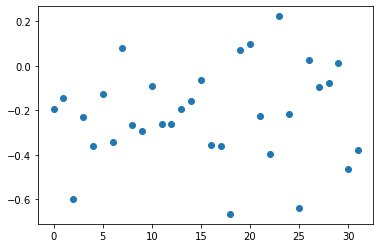

In [116]:
plt.plot(correlation_coef_pareidolia_objects, 'o')

In [117]:
len(correlation_coef_pareidolia_objects)

32

In [ ]:
import pandas as pd

# Sample data with different lengths
#correlation_coef_faces = [0.5, 0.6, 0.7]
#correlation_coef_objects = [0.3, 0.4]
#correlation_coef_pareidolia = [0.2, 0.3, 0.1, 0.4]

# Create a DataFrame with a common index
index = range(max(len(correlation_coef_faces), len(correlation_coef_objects), len(correlation_coef_pareidolia)))

data = {
    'sr_f': correlation_coef_faces + [None] * (len(index) - len(correlation_coef_faces)),
    'sr_o': correlation_coef_objects + [None] * (len(index) - len(correlation_coef_objects)),
    'sr_p': correlation_coef_pareidolia + [None] * (len(index) - len(correlation_coef_pareidolia))
}

df = pd.DataFrame(data, index=index)

# Specify the file name
csv_file = 'data.csv'

# Save DataFrame to CSV file
df.to_csv(csv_file)

print(f'Data saved to {csv_file}')


In [ ]:
import csv

# Sample data
data = [
    ['Name', 'Age', 'City'],
    ['Alice', 28, 'New York'],
    ['Bob', 35, 'Los Angeles'],
    ['Charlie', 22, 'Chicago']
]

# Specify the file name
csv_file = 'data.csv'

# Write data to CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f'Data saved to {csv_file}')


In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_objects).flatten(), np.array(eg_objects).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_pareidolia).flatten(), np.array(eg_pareidolia).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
len(dg_pareidolia)

In [ ]:
len(dg_faces[:83])

In [ ]:
len(dg_objects[:83])

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_faces[:83]).flatten(), np.array(dg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_faces[:83]).flatten(), np.array(dg_pareidolia[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_pareidolia[:83]).flatten(), np.array(dg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_pareidolia[:83]).flatten(), np.array(eg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_pareidolia[:83]).flatten(), np.array(eg_faces[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_faces[:83]).flatten(), np.array(eg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# Generate two arrays with random data
array1 = np.random.rand(100)
array2 = np.random.rand(100)

# Calculate Spearman's correlation coefficient and p-value
correlation, p_value = spearmanr(array1, array2)

print("Spearman's correlation coefficient:", correlation)
print("p-value:", p_value)


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# define two eye gaze heatmaps
heatmap1 = np.array([[0.2, 0.3, 0.1],
                     [0.1, 0.4, 0.3],
                     [0.3, 0.2, 0.1]])

heatmap2 = np.array([[0.1, 0.2, 0.3],
                     [0.2, 0.3, 0.2],
                     [0.3, 0.1, 0.1]])

# flatten the heatmaps into 1D arrays
flat_heatmap1 = heatmap1.flatten()
flat_heatmap2 = heatmap2.flatten()

# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(flat_heatmap1, flat_heatmap2)

print("Correlation coefficient:", corr)
print("p-value:", p_value)


In [ ]:
np.shape(b)

In [ ]:
np.shape(a)

In [ ]:
np.shape(correlation_coef)

In [ ]:
plt.imshow(correlation_coef)

In [ ]:
correlation_coef[83:, :83]

In [ ]:
plt.imshow(correlation_coef[83:, :83])

In [ ]:
plt.plot(np.diagonal(correlation_coef[100:, :100]), 'o') #faces

In [ ]:
np.mean(np.diagonal(correlation_coef[100:, :100]))

In [ ]:
plt.plot(np.diagonal(correlation_coef[100:, :100]), 'o') #obj

In [ ]:
np.mean(np.diagonal(correlation_coef[86:, :86]))

In [ ]:
plt.plot(np.diagonal(correlation_coef[83:, :83]), 'o') #pare

In [ ]:
np.mean(np.diagonal(correlation_coef[83:, :83]))

In [ ]:
plt.imshow(y_objects['1153']['a'])

In [ ]:
y_faces

In [ ]:
np.shape(imgs)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

image = face()

# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

In [ ]:
model.included_fixations

In [ ]:
fixation_history_x

In [ ]:
fixation_history_x[model.included_fixations]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

x = {}

for i in range(len(imgs)):
    
    image = imgs[i]
    
    # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
    fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
    fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
    x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
    y_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    axs[0].imshow(image)
    axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()

In [ ]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()

x = {}

for i in range(len(imgs)):
    
    image = imgs[i]
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0, 0]
    
    x[img_name[i].split('.')[0]] = a
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    # plt.savefig(os.path.join('DG2_heatmaps', '{0}.jpg'.format(i)))
    '''
    
    #break

In [ ]:
image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)

In [ ]:
%%capture captured_output
# Your code here
print(model)

In [ ]:
with open("DG1_arch.txt", "w") as f:
    f.write(captured_output.stdout)
